## Titanic Data Analysis 
### Using Logistic Regression

In [1]:
# Importing Python Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
titanic = pd.read_csv("D:/Machine Learning Bootcamp/Datasets/Titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### Analyzing Data Set

<Axes: xlabel='Survived', ylabel='count'>

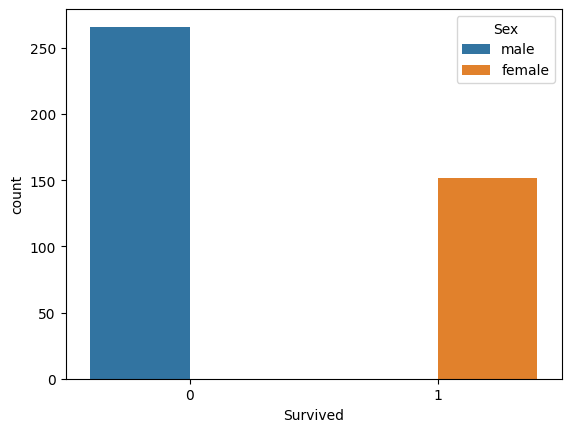

In [4]:
# Try hue for p-class as well
sns.countplot(x="Survived", hue="Sex", data=titanic)

<Axes: ylabel='Frequency'>

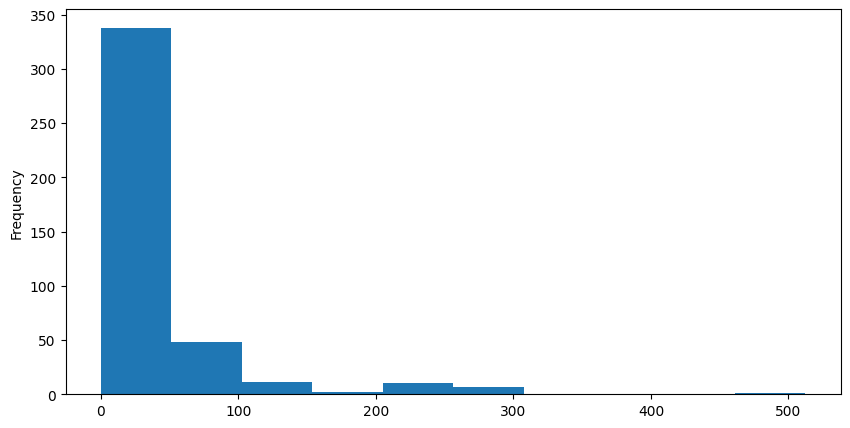

In [5]:
titanic["Fare"].plot.hist(figsize=(10,5))

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<Axes: xlabel='Age', ylabel='count'>

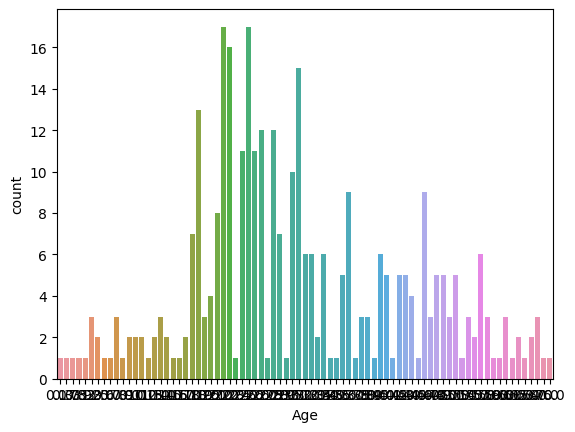

In [7]:
# For other values
sns.countplot(x="Age", data=titanic)

In [8]:
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [9]:
# To check null or missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: xlabel='Pclass', ylabel='Age'>

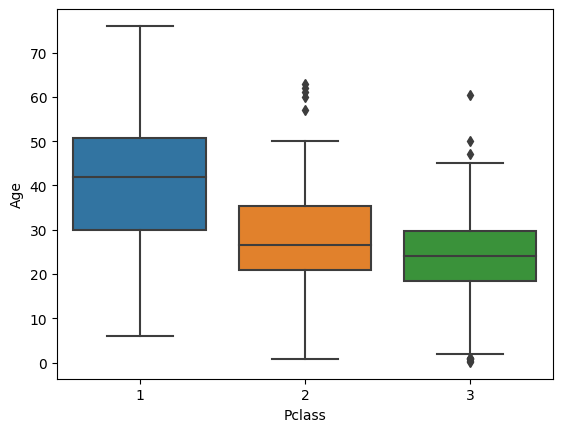

In [10]:
sns.boxplot(x="Pclass", y="Age", data=titanic)

In [11]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
pd.get_dummies(titanic.Sex)

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
413,False,True
414,True,False
415,False,True
416,False,True


In [13]:
# To drop na values
titanic.dropna(inplace=True)

In [14]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S


<Axes: >

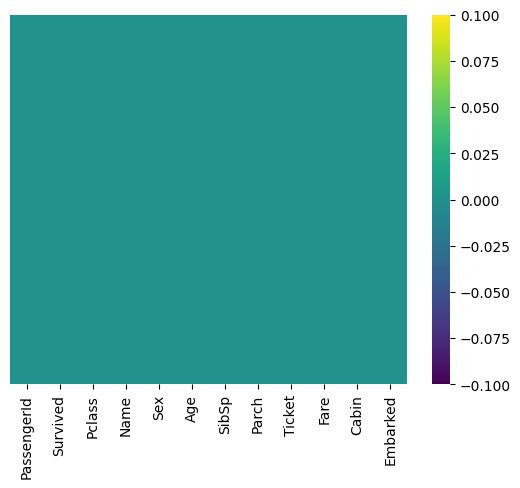

In [15]:
# Check with heat map for any na values.

sns.heatmap(titanic.isnull(),yticklabels=False, cmap="viridis")

<Axes: >

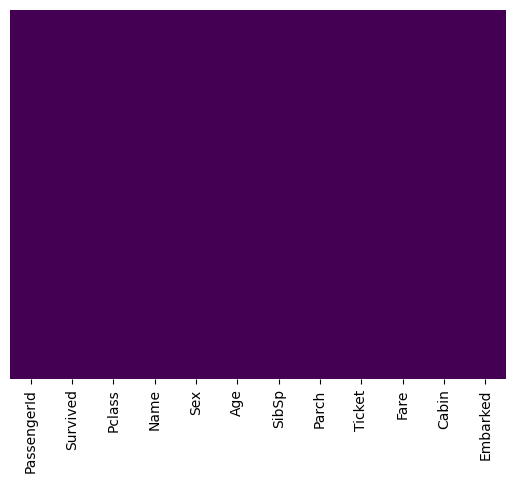

In [16]:
# You can also use cbar(colorbar)=false to remove colors
sns.heatmap(titanic.isnull(),yticklabels=False, cmap="viridis", cbar=False)

In [17]:
# To check if it is in string or not 
# To check different ways remove drop_first=True and test again

sex= pd.get_dummies(titanic["Sex"],drop_first=True)

print(sex.head(5))

     male
12  False
14  False
24  False
26  False
28   True


In [18]:
pc1= pd.get_dummies(titanic["Pclass"], drop_first=True)
pc1.head(5)

,2,3
12,False,False
14,False,False
24,False,False
26,False,False
28,False,False


In [19]:
titanic= pd.concat([titanic, sex, pc1],axis="columns")

In [20]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,2,3
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S,False,False,False
14,906,1,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,False,False,False
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,False,False,False
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.0,0,1,113509,61.9792,B36,C,False,False,False
28,920,0,1,"Brady, Mr. John Bertram",male,41.0,0,0,113054,30.5000,A21,S,True,False,False


In [21]:
# Let us now drop a column to print a dataset name and pclass
titanic.drop(["Sex", "Pclass","Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=True)

In [22]:
titanic.head(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,2,3
12,904,1,23.0,1,0,82.2667,False,False,False
14,906,1,47.0,1,0,61.1750,False,False,False
24,916,1,48.0,1,3,262.3750,False,False,False
26,918,1,22.0,0,1,61.9792,False,False,False
28,920,0,41.0,0,0,30.5000,True,False,False


### Training the Dataset

In [23]:
# Y will say if passenger will survive or not - output
# Y is value to be predicted

X = titanic.drop("Survived",axis=1)
y= titanic["Survived"]

In [24]:
# From sklearn.cross.validation import train_test_split
from sklearn.model_selection import train_test_split

In [25]:
# Random state will take the same sample every time. Try changing or sifferent samles
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()

In [28]:
# Convert all column names to strings
X_train.columns = X_train.columns.astype(str)

In [29]:
logmodel.fit(X_train, y_train)

c:\Users\AYESHA QAMAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
X.columns = X.columns.astype(str)

In [31]:
X_test.columns = X_test.columns.astype(str)
predictions = logmodel.predict(X_test)

In [32]:
#predictions = logmodel.predict(X_test)
print(predictions)


[1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0]


In [33]:
# To test how a model is performing we can test the accuracy or classification report
# Method:1

from sklearn.metrics import classification_report

In [34]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        14\n           1       1.00      1.00      1.00        13\n\n    accuracy                           1.00        27\n   macro avg       1.00      1.00      1.00        27\nweighted avg       1.00      1.00      1.00        27\n'

In [35]:
# Now we can check confusion matrix and check
# Method:2
from sklearn.metrics import confusion_matrix

In [39]:
# Predicted no, Predicted Yes - col1 and col2
# Actual no, Actual Yes - row1 and row2 

confusion_matrix(y_test, predictions)

array([[14,  0],
       [ 0, 13]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score
accuracy= accuracy_score(y_test, predictions)

In [41]:
print(accuracy)

1.0
